<a href="https://colab.research.google.com/github/doctordoom101/Twitter-Sentiment-Analysis---Programming-Language-Lecturer-Final-Project/blob/main/Project_PL_Algortihm_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algorithm Implementation

# **Naive Bayes**

**instalasi dan impor library**

In [ ]:
!pip install scikit-learn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Datasets_projectPL/hasil_labelling.csv')

print(data.isna().sum())

full_text      0
klasifikasi    0
dtype: int64


In [ ]:
data = data.dropna(subset=['full_text'])  # Remove rows with NaN in 'full_text'

In [ ]:
print(data.isna().sum())

full_text      0
klasifikasi    0
dtype: int64


In [ ]:
label_mapping = {
    'negatif': 0,
    'netral': 1,
    'positif': 2
}
data["sentiment_numeric"] = data["klasifikasi"].map(label_mapping)
data

,full_text,klasifikasi,sentiment_numeric
0,meet dr perri adler clinic psychologist lead j...,negatif,0
1,mani parent know teenag year memor excit also ...,netral,1
2,mani parent know teenag year memor excit also ...,netral,1
3,mani parent know teenag year memor excit also ...,netral,1
4,mani parent know teenag year memor excit also ...,netral,1
...,...,...,...
6006,world teen mental well day highlight need incl...,negatif,0
6007,today accord 1 7 peopl age 10 19 current exper...,negatif,0
6008,world teen mental well day establish rais awar...,negatif,0
6009,talk child teen mental health may feel uncomfo...,negatif,0


**splitting data training and testing**

In [ ]:
# Split data into features (X) and labels (y)
X = data['full_text']
y = data['sentiment_numeric']

# Perform an 80:20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f'Jumlah Data Latih : {len(X_train)}')
print(f'Jumlah Data Uji : {len(X_test)}')

Jumlah Data Latih : 4808
Jumlah Data Uji : 1203


**ekstraksi fitur : mengubah teks menjadi vektor fitur**

In [ ]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
print('hasil ekstraksi fitur')
print('---------------------')
print('fitur data latih:')
print(X_train_vectorized.toarray())
print('\nfitur data uji:')
print(X_test_vectorized.toarray())

hasil ekstraksi fitur
---------------------
fitur data latih:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

fitur data uji:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## **training naive bayes model**

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, y_train)

MultinomialNB()

## **evaluasi model**

Accuracy:  0.7539484621778886

Classification Report:
              precision    recall  f1-score   support

     negatif       0.77      0.87      0.81       680
      netral       1.00      0.28      0.43       101
     positif       0.71      0.68      0.70       422

    accuracy                           0.75      1203
   macro avg       0.83      0.61      0.65      1203
weighted avg       0.77      0.75      0.74      1203

MAE: 0.4314214463840399
MSE: 0.802161263507897
RMSE: 0.8956345591299484

Confusion Matrix: 
 [[591   0  89]
 [ 46  28  27]
 [134   0 288]]


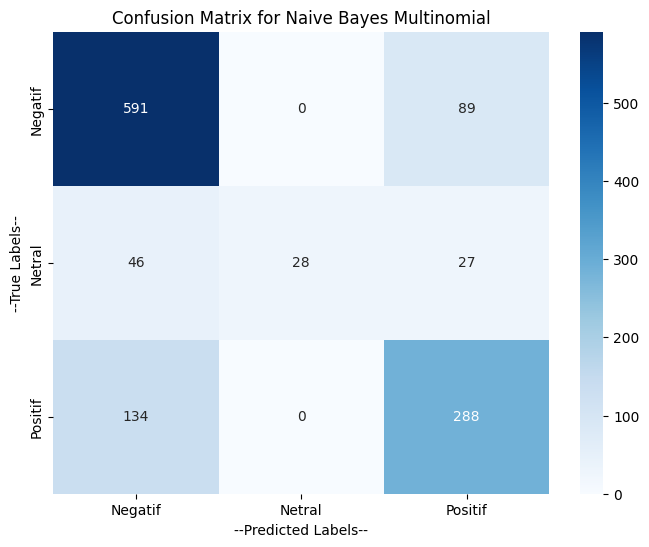

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for heatmap
from matplotlib.colorbar import Colorbar

nb_pred = nb_model.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, nb_pred)
print('Accuracy: ', accuracy)

print('\nClassification Report:')
target_names = ['negatif', 'netral', 'positif']
print(classification_report(y_test, nb_pred, target_names=target_names))

mae = mean_absolute_error(y_test, nb_pred)
mse = mean_squared_error(y_test, nb_pred)
rmse = np.sqrt(mse)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

print('\nConfusion Matrix: \n', confusion_matrix(y_test, nb_pred))

nb_conf_matrix = confusion_matrix(y_test, nb_pred)
# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(nb_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negatif', 'Netral', 'Positif'],
            yticklabels=['Negatif', 'Netral', 'Positif'],
            cbar=True)
plt.title('Confusion Matrix for Naive Bayes Multinomial')
plt.xlabel('--Predicted Labels--')
plt.ylabel('--True Labels--')

plt.show()


# **Support Vector Machine Learning (SVM)**

**impor library needed**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Datasets_projectPL/hasil_labelling.csv')

print(data.isna().sum())

full_text      0
klasifikasi    0
dtype: int64


In [ ]:
data = data.dropna(subset=['full_text'])  # Remove rows with NaN in 'full_text'

In [ ]:
print(data.isna().sum())

full_text      0
klasifikasi    0
dtype: int64


In [ ]:
data

,full_text,klasifikasi
0,meet dr perri adler clinic psychologist lead j...,negatif
1,mani parent know teenag year memor excit also ...,netral
2,mani parent know teenag year memor excit also ...,netral
3,mani parent know teenag year memor excit also ...,netral
4,mani parent know teenag year memor excit also ...,netral
...,...,...
6006,world teen mental well day highlight need incl...,negatif
6007,today accord 1 7 peopl age 10 19 current exper...,negatif
6008,world teen mental well day establish rais awar...,negatif
6009,talk child teen mental health may feel uncomfo...,negatif


In [ ]:
label_mapping = {
    'negatif': 0,
    'netral': 1,
    'positif': 2
}
data["sentiment_numeric"] = data["klasifikasi"].map(label_mapping)
data

,full_text,klasifikasi,sentiment_numeric
0,meet dr perri adler clinic psychologist lead j...,negatif,0
1,mani parent know teenag year memor excit also ...,netral,1
2,mani parent know teenag year memor excit also ...,netral,1
3,mani parent know teenag year memor excit also ...,netral,1
4,mani parent know teenag year memor excit also ...,netral,1
...,...,...,...
6006,world teen mental well day highlight need incl...,negatif,0
6007,today accord 1 7 peopl age 10 19 current exper...,negatif,0
6008,world teen mental well day establish rais awar...,negatif,0
6009,talk child teen mental health may feel uncomfo...,negatif,0


**splitting data menjadi 80:20 data training dan testing**

In [ ]:
# Split data into features (X) and labels (y)
X = data['full_text']
y = data['sentiment_numeric']

# Perform an 80:20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f'Jumlah Data Latih : {len(X_train)}')
print(f'Jumlah Data Uji : {len(X_test)}')

Jumlah Data Latih : 4808
Jumlah Data Uji : 1203


**vectorize data training**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# initiate TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# transformasi data teks menjadi vektor TF-IDF
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
feature_names = tfidf_vectorizer.get_feature_names_out()

print("hasil transformaasi data training: ")
print(X_train_tfidf)

print('\nfitur dari vektor TF-IDF: ')
print(feature_names)

hasil transformaasi data training: 
  (0, 8446)	0.3893751784178704
  (0, 5922)	0.3413930218230143
  (0, 3671)	0.08493823193851718
  (0, 4982)	0.08445817886742746
  (0, 1682)	0.3782730878335293
  (0, 2081)	0.40923837805787144
  (0, 6393)	0.3974188062595714
  (0, 8420)	0.35580970357968683
  (0, 5116)	0.33030535201618794
  (0, 7831)	0.11523727914535031
  (1, 8041)	0.26386040911485015
  (1, 3668)	0.28462046433230603
  (1, 3522)	0.2403100466540526
  (1, 1481)	0.1938459092148191
  (1, 4604)	0.2012325032101152
  (1, 1359)	0.39687981141588985
  (1, 1063)	0.33425190551115497
  (1, 3392)	0.1412043000535082
  (1, 8790)	0.2488299327391621
  (1, 2853)	0.20829566905686475
  (1, 2070)	0.16459752675715222
  (1, 2959)	0.22391525219443384
  (1, 7834)	0.1796464182807371
  (1, 3295)	0.2572373795155817
  (1, 7599)	0.2410215020606504
  :	:
  (4806, 7831)	0.11850741997491891
  (4807, 7427)	0.2566360054880272
  (4807, 4575)	0.2222527974466953
  (4807, 2785)	0.2306261126849988
  (4807, 2158)	0.2052923524693046

## **training svm model**

In [ ]:
# initiate svm model
svm_model = SVC(kernel='linear', random_state=42)

# training model dengan data training yang sudah di vektorisassi
svm_model.fit(X_train_tfidf, y_train)

#  print parameter model
print("Parameter model SVM:")
print(f"Kernel:", svm_model.kernel)
print(f"C:", svm_model.C)
print(f"Intercept: [svm_model.intercept_]")
print(f"Support Vectors: {svm_model.support_vectors_}")

Parameter model SVM:
Kernel: linear
C: 1.0
Intercept: [svm_model.intercept_]
Support Vectors:   (0, 682)	0.28277627012409123
  (0, 1063)	0.33425190551115497
  (0, 1359)	0.39687981141588985
  (0, 1481)	0.1938459092148191
  (0, 2070)	0.16459752675715222
  (0, 2853)	0.20829566905686475
  (0, 2959)	0.22391525219443384
  (0, 3295)	0.2572373795155817
  (0, 3392)	0.1412043000535082
  (0, 3522)	0.2403100466540526
  (0, 3668)	0.28462046433230603
  (0, 3671)	0.05182374776047022
  (0, 4604)	0.2012325032101152
  (0, 4982)	0.05153085080817904
  (0, 7599)	0.2410215020606504
  (0, 7834)	0.1796464182807371
  (0, 8041)	0.26386040911485015
  (0, 8790)	0.2488299327391621
  (1, 1808)	0.41362977592578964
  (1, 1948)	0.4951954504892299
  (1, 2073)	0.283087652386372
  (1, 2183)	0.1882197345744973
  (1, 3671)	0.054010923602600035
  (1, 4566)	0.20586147067983557
  (1, 4905)	0.25758756332345695
  :	:
  (3478, 3671)	0.04240319397870354
  (3478, 3751)	0.17277927701243023
  (3478, 3810)	0.2029065283941519
  (3478,

## **evaluasi model**

In [ ]:
# evaluasi model menggunakan data testing yang sudah ter-vectorized0
svm_pred = svm_model.predict(X_test_tfidf)

#  print beberapa contoh hasil prediksi
print("contoh beberapa hasil prediksi:")
print(svm_pred[:10])

contoh beberapa hasil prediksi:
[0 0 1 2 2 2 0 0 2 0]


Accuracy: 0.8403990024937655

Classification Report:
              precision    recall  f1-score   support

     negatif       0.84      0.93      0.88       680
      netral       0.90      0.38      0.53       101
     positif       0.84      0.81      0.82       422

    accuracy                           0.84      1203
   macro avg       0.86      0.70      0.75      1203
weighted avg       0.84      0.84      0.83      1203

MAE: 0.2635078969243558
MSE: 0.4713216957605985
RMSE: 0.6865287290132864

Confusion Matrix:
[[633   3  44]
 [ 43  38  20]
 [ 81   1 340]]


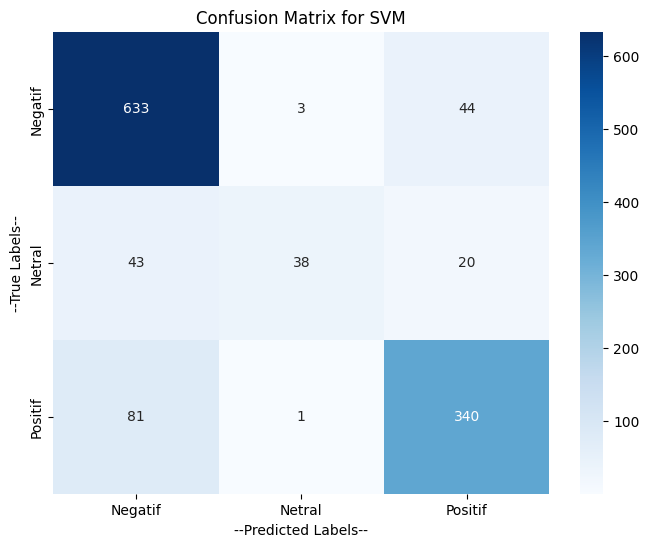

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# evaluasi performa model
svm_acc = accuracy_score(y_test, svm_pred)
print(f"Accuracy: {svm_acc}")

# classification report
print("\nClassification Report:")
target_names = ['negatif', 'netral', 'positif']
print(classification_report(y_test, svm_pred, target_names=target_names))

mae = mean_absolute_error(y_test, svm_pred)
mse = mean_squared_error(y_test, svm_pred)
rmse = np.sqrt(mse)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, svm_pred))

svm_conf_matrix = confusion_matrix(y_test, svm_pred)
# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negatif', 'Netral', 'Positif'],
            yticklabels=['Negatif', 'Netral', 'Positif'],
            cbar=True)
plt.title('Confusion Matrix for SVM')
plt.xlabel('--Predicted Labels--')
plt.ylabel('--True Labels--')

plt.show()

# **K-Nearest Neighbor (KNN)**

**impor library needed**

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Datasets_projectPL/hasil_labelling.csv')

print(data.isna().sum())

full_text      0
klasifikasi    0
dtype: int64


In [ ]:
data = data.dropna(subset=['full_text'])  # Remove rows with NaN in 'full_text'

In [ ]:
print(data.isna().sum())

full_text      0
klasifikasi    0
dtype: int64


In [ ]:
label_mapping = {
    'negatif': 0,
    'netral': 1,
    'positif': 2
}
data["sentiment_numeric"] = data["klasifikasi"].map(label_mapping)
data

,full_text,klasifikasi,sentiment_numeric
0,meet dr perri adler clinic psychologist lead j...,negatif,0
1,mani parent know teenag year memor excit also ...,netral,1
2,mani parent know teenag year memor excit also ...,netral,1
3,mani parent know teenag year memor excit also ...,netral,1
4,mani parent know teenag year memor excit also ...,netral,1
...,...,...,...
6006,world teen mental well day highlight need incl...,negatif,0
6007,today accord 1 7 peopl age 10 19 current exper...,negatif,0
6008,world teen mental well day establish rais awar...,negatif,0
6009,talk child teen mental health may feel uncomfo...,negatif,0


**split data into 80:20 data training and testing**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Split data into features (X) and labels (y)
X = data['full_text']
y = data['sentiment_numeric']

# Perform an 80:20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(f'Jumlah Data Latih : {len(X_train)}')
print(f'Jumlah Data Uji : {len(X_test)}')

Jumlah Data Latih : 4207
Jumlah Data Uji : 1804


**transformasi data (vektorisasi)**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
feature_names = tfidf.get_feature_names_out()

print("hasil transformaasi data training: ")
print(X_train_tfidf)

print('\nfitur dari vektor TF-IDF: ')
print(feature_names)

hasil transformaasi data training: 
  (0, 7140)	0.21803072589075884
  (0, 1207)	0.2782258326527127
  (0, 4470)	0.21135327146472532
  (0, 3597)	0.2651865191119948
  (0, 2459)	0.16040970489138276
  (0, 4420)	0.2428956653826657
  (0, 4491)	0.17407348279361548
  (0, 1387)	0.18527464438328958
  (0, 7454)	0.1311081408611986
  (0, 3045)	0.1788212947257233
  (0, 2463)	0.158411614899182
  (0, 6650)	0.18527464438328958
  (0, 6436)	0.1085695921656377
  (0, 441)	0.2298563518419478
  (0, 7572)	0.17283644935614118
  (0, 3412)	0.0368662719218994
  (0, 4634)	0.03665464140789797
  (0, 5012)	0.2782258326527127
  (0, 7296)	0.049817236769323744
  (0, 6109)	0.18270055862071186
  (0, 3913)	0.09561263181751087
  (0, 2031)	0.1767001587627334
  (0, 6740)	0.22340300218438153
  (0, 8253)	0.1068092126929642
  (0, 4209)	0.16627296635760483
  :	:
  (4205, 3913)	0.22804951983070518
  (4206, 4087)	0.3227131779576771
  (4206, 7673)	0.26267953225461144
  (4206, 4530)	0.2968580940576832
  (4206, 4610)	0.2968580940576832

## **training KNN model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_tfidf, y_train)
knn_pred = model.predict(X_test_tfidf)

In [ ]:
# Mencetak parameter model
print('Parameter KNN:')
print('n_neighbors:', model.n_neighbors)
print('weights:', model.weights)
print('algorithm:', model.algorithm)
print('metric:', model.metric)

Parameter KNN:
n_neighbors: 5
weights: uniform
algorithm: auto
metric: minkowski


## **evaluasi model**

Accuracy:  0.6380266075388027

Classification Report:
              precision    recall  f1-score   support

     negatif       0.65      0.85      0.74      1009
      netral       0.54      0.28      0.37       152
     positif       0.62      0.39      0.48       643

    accuracy                           0.64      1804
   macro avg       0.60      0.51      0.53      1804
weighted avg       0.63      0.64      0.61      1804

MAE: 0.6430155210643016
MSE: 1.20509977827051
RMSE: 1.0977703668210899

Confusion Matrix:
[[861  20 128]
 [ 87  42  23]
 [379  16 248]]


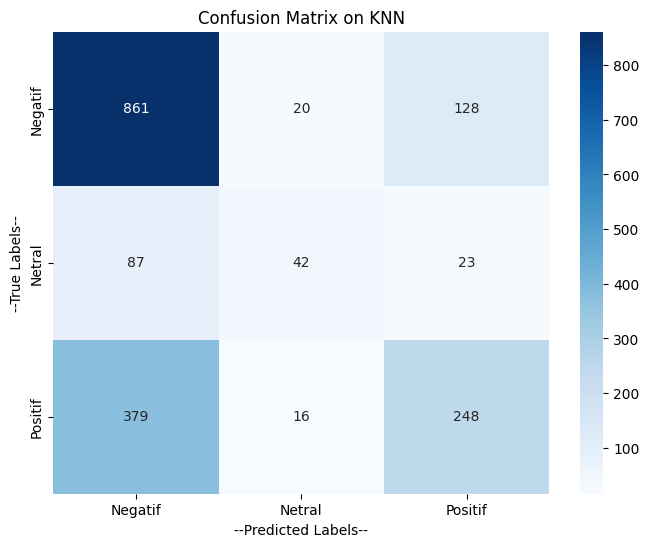

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# evaluasi model
y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

# classification report
print("\nClassification Report:")
target_names = ['negatif', 'netral', 'positif']
print(classification_report(y_test, y_pred, target_names=target_names))

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negatif', 'Netral', 'Positif'],
            yticklabels=['Negatif', 'Netral', 'Positif'],
            cbar=True)
plt.title('Confusion Matrix on KNN')
plt.xlabel('--Predicted Labels--')
plt.ylabel('--True Labels--')

plt.show()

# **Convolutional Neural Network (CNN)**

In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Datasets_projectPL/hasil_labelling.csv')

print(data.isna().sum())

full_text      0
klasifikasi    0
dtype: int64


In [ ]:
# Encode target variable
label_mapping = {'negatif': 0, 'netral': 1, 'positif': 2}
data['sentiment_encoded'] = data['klasifikasi'].map(label_mapping)
y = data['sentiment_encoded']
y_encoded = to_categorical(y)

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['full_text']).toarray()
y = data['sentiment_encoded']

In [ ]:
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X, to_categorical(y), test_size=0.2, random_state=42)

In [ ]:
X_train_cnn = X_train_cnn.reshape((X_train_cnn.shape[0], X_train_cnn.shape[1], 1))
X_test_cnn = X_test_cnn.reshape((X_test_cnn.shape[0], X_test_cnn.shape[1], 1))

In [ ]:
# Initialize CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(100, activation='relu'))
cnn_model.add(Dense(y_train_cnn.shape[1], activation='softmax'))

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


## **Training CNN Model**

In [ ]:
# Train the model
cnn_model.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
151/151 [==============================] - 97s 635ms/step - loss: 0.7253 - accuracy: 0.6730
Epoch 2/10
151/151 [==============================] - 73s 486ms/step - loss: 0.2646 - accuracy: 0.9070
Epoch 3/10
151/151 [==============================] - 75s 495ms/step - loss: 0.0894 - accuracy: 0.9744
Epoch 4/10
151/151 [==============================] - 73s 484ms/step - loss: 0.0347 - accuracy: 0.9925
Epoch 5/10
151/151 [==============================] - 73s 484ms/step - loss: 0.0211 - accuracy: 0.9954
Epoch 6/10
151/151 [==============================] - 72s 475ms/step - loss: 0.0105 - accuracy: 0.9979
Epoch 7/10
151/151 [==============================] - 73s 486ms/step - loss: 0.0075 - accuracy: 0.9983
Epoch 8/10
151/151 [==============================] - 73s 484ms/step - loss: 0.0046 - accuracy: 0.9988
Epoch 9/10
151/151 [==============================] - 72s 480ms/step - loss: 0.0035 - accuracy: 0.9990
Epoch 10/10
151/151 [==============================] - 73s 482ms/step - l

## **evaluasi model**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [ ]:
# Make predictions
cnn_pred = cnn_model.predict(X_test_cnn)
cnn_pred_classes = np.argmax(cnn_pred, axis=1)

# Convert y_test_cnn to class labels
y_test_cnn_classes = np.argmax(y_test_cnn, axis=1)

38/38 [==============================] - 4s 102ms/step


CNN Accuracy:  0.8063175678253174

Classification Report:
              precision    recall  f1-score   support

     negatif       0.83      0.87      0.85       680
      netral       0.66      0.50      0.57       101
     positif       0.78      0.77      0.78       422

    accuracy                           0.81      1203
   macro avg       0.76      0.72      0.73      1203
weighted avg       0.80      0.81      0.80      1203

MAE: 0.32418952618453867
MSE: 0.5852036575228595
RMSE: 0.7649860505413544

Confusion Matrix:
[[592  17  71]
 [ 31  51  19]
 [ 86   9 327]]


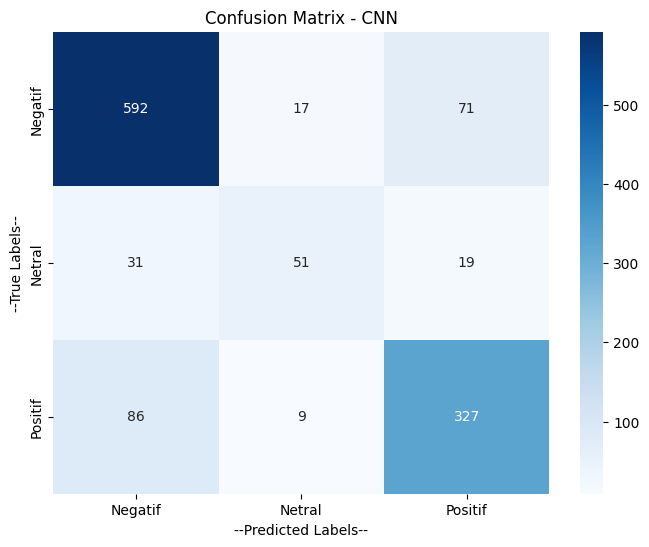

In [ ]:
# Evaluate the model
_, cnn_acc = cnn_model.evaluate(X_test_cnn, y_test_cnn, verbose=0)
print("CNN Accuracy: ", cnn_acc)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Classification report
print("\nClassification Report:")
target_names = ['negatif', 'netral', 'positif']
print(classification_report(y_test_cnn_classes, cnn_pred_classes, target_names=target_names))

# Calculate MAE, MSE, RMSE
cnn_mae = mean_absolute_error(y_test_cnn_classes, cnn_pred_classes)
cnn_mse = mean_squared_error(y_test_cnn_classes, cnn_pred_classes)
cnn_rmse = np.sqrt(cnn_mse)

print(f"MAE: {cnn_mae}")
print(f"MSE: {cnn_mse}")
print(f"RMSE: {cnn_rmse}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_cnn_classes, cnn_pred_classes))

cnn_conf_matrix = confusion_matrix(y_test_cnn_classes, cnn_pred_classes)
# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(cnn_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negatif', 'Netral', 'Positif'],
            yticklabels=['Negatif', 'Netral', 'Positif'],
            cbar=True)
plt.title('Confusion Matrix - CNN')
plt.xlabel('--Predicted Labels--')
plt.ylabel('--True Labels--')

plt.show()


# **Multiclass Classification Accuracy**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.utils import to_categorical

Naive Bayes Confusion Matrix Accuracy: 0.75
SVM Confusion Matrix Accuracy: 0.84
CNN Confusion Matrix Accuracy: 0.81
Hybrid Model Accuracy: 0.82
Hybrid Model Confusion Matrix Accuracy: 0.82
Hybrid model accuracy is valid.


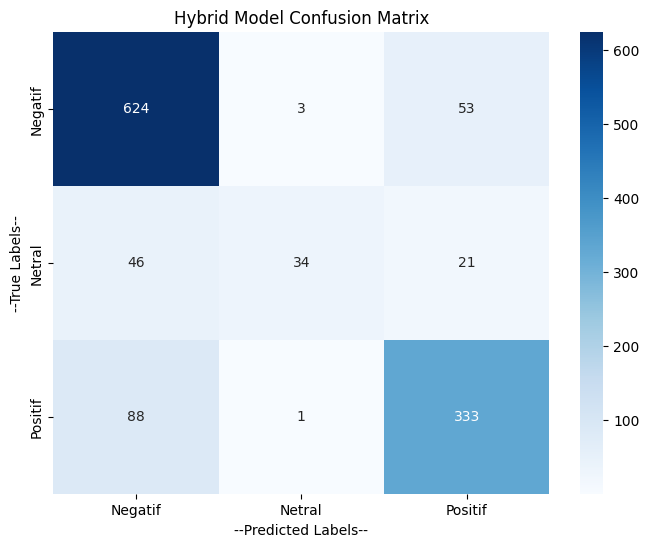

In [ ]:
### Hybrid Model

# Function to calculate accuracy from confusion matrix
def calculate_accuracy_from_confusion_matrix(conf_matrix):
    total_samples = np.sum(conf_matrix)
    correct_predictions = np.trace(conf_matrix)
    return correct_predictions / total_samples

nb_conf_matrix_acc = calculate_accuracy_from_confusion_matrix(nb_conf_matrix)
svm_conf_matrix_acc = calculate_accuracy_from_confusion_matrix(svm_conf_matrix)
cnn_conf_matrix_acc = calculate_accuracy_from_confusion_matrix(cnn_conf_matrix)

# Combine predictions from NB, SVM, CNN
hybrid_pred = []
for i in range(len(nb_pred)):
    preds = [nb_pred[i], svm_pred[i], cnn_pred_classes[i]]
    hybrid_pred.append(np.bincount(preds).argmax())

hybrid_pred = np.array(hybrid_pred)
hybrid_acc = accuracy_score(y_test, hybrid_pred)
hybrid_conf_matrix = confusion_matrix(y_test, hybrid_pred)
hybrid_conf_matrix_acc = calculate_accuracy_from_confusion_matrix(hybrid_conf_matrix)

print(f"Naive Bayes Confusion Matrix Accuracy: {nb_conf_matrix_acc:.2f}")
print(f"SVM Confusion Matrix Accuracy: {svm_conf_matrix_acc:.2f}")
print(f"CNN Confusion Matrix Accuracy: {cnn_conf_matrix_acc:.2f}")
print(f"Hybrid Model Accuracy: {hybrid_acc:.2f}")
print(f"Hybrid Model Confusion Matrix Accuracy: {hybrid_conf_matrix_acc:.2f}")

# Check if the calculated accuracies match the model accuracies
if not np.isclose(hybrid_acc, hybrid_conf_matrix_acc):
    print("Hybrid model accuracy mismatch! Please adjust the model.")
else:
    print("Hybrid model accuracy is valid.")

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(hybrid_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negatif', 'Netral', 'Positif'],
            yticklabels=['Negatif', 'Netral', 'Positif'],
            cbar=True)
plt.title('Hybrid Model Confusion Matrix')
plt.xlabel('--Predicted Labels--')
plt.ylabel('--True Labels--')

plt.show()


# **Visualization**

In [ ]:
!pip install python-igraph
!pip install cairocffi  # Optional, for better plotting


In [ ]:
import pandas as pd
import itertools
import plotly.express as px
from collections import Counter
import numpy as np
import igraph as ig
import pandas as pd

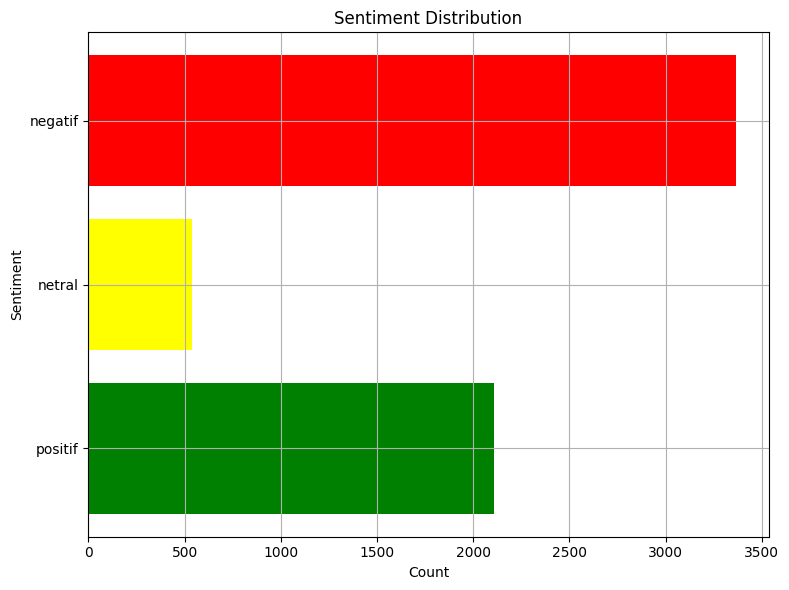

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Datasets_projectPL/hasil_labelling.csv')

# Count the occurrences of each sentiment
sentiment_counts = df['klasifikasi'].value_counts()

# Create a DataFrame from the counts
sentiment_counts_df = pd.DataFrame(sentiment_counts).reset_index()
sentiment_counts_df.columns = ['sentiment', 'count']

# Sort by sentiment to maintain consistent order
sentiment_counts_df.sort_values(by='sentiment', ascending=False, inplace=True)

# Plotting the funnel chart
plt.figure(figsize=(8, 6))
plt.barh(sentiment_counts_df['sentiment'], sentiment_counts_df['count'], color=['green', 'yellow', 'red'])
plt.xlabel('Count')
plt.ylabel('Sentiment')
plt.title('Sentiment Distribution')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Funnel Chart of Sentiment Distribution
sentiment_counts = data['klasifikasi'].value_counts()
fig_funnel = px.funnel(sentiment_counts, x=sentiment_counts.values, y=sentiment_counts.index, title='Sentiment Distribution')
fig_funnel.show()

# Sentiment Distributions
fig_dist = px.histogram(data, x='klasifikasi', title='Sentiment Distributions')
fig_dist.show()

# Radar Chart
sentiment_stats = data['klasifikasi'].value_counts()
fig_radar = px.line_polar(sentiment_stats, r=sentiment_stats.values, theta=sentiment_stats.index, line_close=True, title='Sentiment Radar Chart')
fig_radar.show()

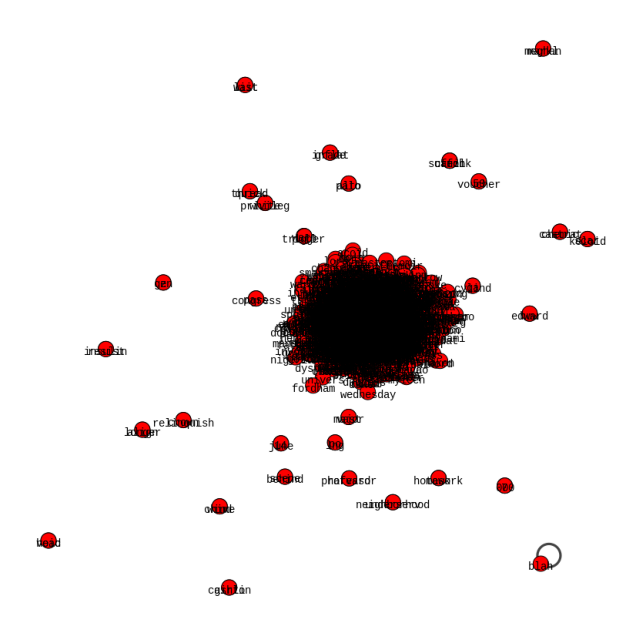

In [ ]:
import pandas as pd
import itertools
import plotly.express as px
from collections import Counter
import numpy as np
import igraph as ig
import pandas as pd
## igraph model
# Filter teks positif
data = pd.read_csv("/content/drive/MyDrive/Datasets_projectPL/hasil_labelling.csv")
positive_texts = data[data['klasifikasi'] == 'positif']['full_text']

# Ekstraksi pasangan kata
word_pairs = list(itertools.chain(*[list(zip(words.split()[:-1], words.split()[1:])) for words in positive_texts]))

# Hitung frekuensi pasangan kata
word_counts = Counter(word_pairs)

# Buat edges untuk graph
edges = [(word1, word2, count) for (word1, word2), count in word_counts.items() if count > 1]

# Buat graph
g = ig.Graph.TupleList(edges, directed=False, edge_attrs={'weight': [count for _, _, count in edges]})

# Buat layout graph
layout = g.layout_fruchterman_reingold()

# Visual style untuk plot
visual_style = {}
visual_style["vertex_size"] = 20
visual_style["vertex_label"] = g.vs["name"]
visual_style["edge_width"] = [1 + 2 * np.log(weight) for weight in g.es["weight"]]
visual_style["layout"] = layout
visual_style["bbox"] = (800, 800)
visual_style["margin"] = 50

# Simpan plot sebagai file gambar
ig.plot(g, "network_plot.png", **visual_style)

# Tampilkan gambar menggunakan Matplotlib
img = plt.imread("network_plot.png")
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import pandas as pd
from collections import Counter

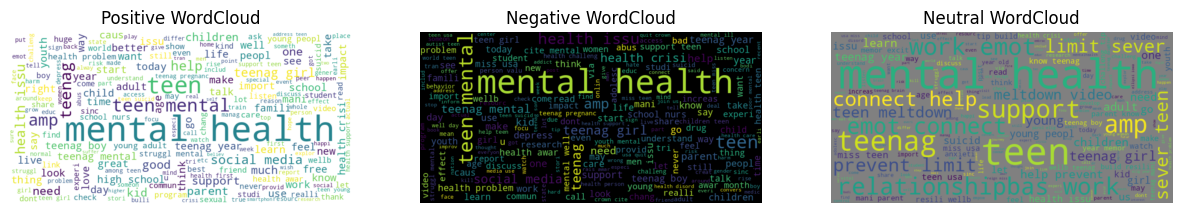

In [ ]:
# Membuat DataFrame
df = pd.DataFrame(data)

# Pisahkan teks berdasarkan sentimen
positive_texts = " ".join(df[df['klasifikasi'] == 'positif']['full_text'])
negative_texts = " ".join(df[df['klasifikasi'] == 'negatif']['full_text'])
neutral_texts = " ".join(df[df['klasifikasi'] == 'netral']['full_text'])

# Buat WordCloud untuk setiap kategori sentimen
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_texts)
wordcloud_negative = WordCloud(width=800, height=400, background_color='black').generate(negative_texts)
wordcloud_neutral = WordCloud(width=800, height=400, background_color='gray').generate(neutral_texts)

# Tampilkan WordCloud
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive WordCloud')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative WordCloud')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Neutral WordCloud')
plt.axis('off')

plt.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Load dataset from CSV
data = pd.read_csv('/content/drive/MyDrive/Datasets_projectPL/merged_dataset.csv')

# Rename 'date' to 'created_at' if necessary
if 'date' in data.columns:
    data.rename(columns={'date': 'created_at'}, inplace=True)

# Check if 'created_at' column exists
if 'created_at' in data.columns:
    data['created_at'] = pd.to_datetime(data['created_at'])

    # Number of Tweets Over Time
    tweets_over_time = data.groupby(data['created_at'].dt.date).size().reset_index(name='counts')

    fig = px.line(tweets_over_time, x='created_at', y='counts', title='Number of Tweets Over Time')
    fig.show()
else:
    print("Warning: 'created_at' column not found. Skipping time series analysis.")



<ipython-input-28-43dc2dfe4bd8>:13: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

